# Capítulo 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as stats
import seaborn as sns

En estos ejercicios tenemos que tener en cuenta que los autores no desarrollan la diferencia entre varianza muestral y poblacional en este capítulo, sino recién en la sección de prueba de hipótesis. 

Por lo cual, al principio se verán los diferentes valores que una y otra forma de cálculo tienen sobre la varianza y la desviación estándar.

## Ejercicio 1

In [28]:
datos_ej1 = pd.Series([3, 4, 5, 5, 6, 7])
datos_ej1.describe()


count    6.000000
mean     5.000000
std      1.414214
min      3.000000
25%      4.250000
50%      5.000000
75%      5.750000
max      7.000000
dtype: float64

- Varianza poblacional: statistics.pvariance()

- Varianza muestral: statistics.variance()

----------------------------------------------------

* Desvío estándar poblacional: statistics.stdev()

* Desvío estándar muestral: statistics.stdev()

In [29]:
print(statistics.variance(datos_ej1))
print(statistics.stdev(datos_ej1))

2
1.4142135623730951


In [30]:
print('Respuesta ejercicio 1:')
print('Varianza = ', round(statistics.pvariance(datos_ej1), 2))
print('Desvío estándar = ', round(statistics.pstdev(datos_ej1), 2))

Respuesta ejercicio 1:
Varianza =  1.67
Desvío estándar =  1.29


Vemos que el método *describe()* calcula las medidas de dispesión **muestrales**

Otras medidas de dispersión y otras formas de generar desvío estándar y varianza

In [31]:
# Datos de ejemplo
datos = [1, 2, 3, 4, 5]

# Convertir los datos a una Serie de pandas
serie = pd.Series(datos)

# Calcular medidas adicionales de dispersión
varianza_poblacional = serie.var(ddof = 0) #ddof es grados de libertad 
desviacion_estandar_poblacional = serie.std(ddof=0)
rango = serie.max() - serie.min()
percentiles = serie.quantile([0.25, 0.5, 0.75])

print("\nMedidas adicionales de dispersión:")
print("Varianza Poblacional:", varianza_poblacional)
print("Desviación Estándar Poblacional:", desviacion_estandar_poblacional)
print("Rango:", rango)
print("Percentiles:\n", percentiles)



Medidas adicionales de dispersión:
Varianza Poblacional: 2.0
Desviación Estándar Poblacional: 1.4142135623730951
Rango: 4
Percentiles:
 0.25    2.0
0.50    3.0
0.75    4.0
dtype: float64


Incisos a, b c y d

In [60]:
ej0 = pd.Series([3, 4, 5, 5, 6, 7])


ej1 = pd.Series([i+2  for i in ej0])
ej2 = pd.Series([i-2 for i in ej0])
ej3 = pd.Series([elemento + 2 if i % 2 == 0 else elemento - 2 for i, elemento in enumerate(ej0)])
# El enumerate da como resultado el i que es el índice y el elemento que es el valor

ej4 = pd.Series([i*2 for i in ej0])
ej5 = pd.Series([i/2 for i in ej0])


print(ej0)
print('-' *35)

print("Dato base de varianza",round(ej0.var(ddof= 0),2))
print("Dato base de desv. estándar:",round(ej0.std(ddof= 0),2))

print('-' *35, '\na) Sumando una constante')
print('Varianza:', round(ej1.var(ddof= 0),2))
print('Desvío estándar:',round(ej1.std(ddof= 0),2))

print('-' *35, '\nb) Restando una constante')
print('Varianza:', round(ej2.var(ddof= 0),2))
print('Desvío estándar:',round(ej2.std(ddof= 0),2))

print('-' *35, '\nc) Sumando y restando alternativamente una constante igual veces')
print(ej3)
print('-' *35)

print('Varianza:', round(ej3.var(ddof= 0),2))
print('Desvío estándar:',round(ej3.std(ddof= 0),2))

print('-' *35, '\nd) Multiplicando por una constante')
print('Varianza:', round(ej4.var(ddof= 0),2))
print('Desvío estándar:',round(ej4.std(ddof= 0),2))


print('-' *35, '\ne) Dividiendo por una constante')
print('Varianza:', round(ej5.var(ddof= 0),2))
print('Desvío estándar:',round(ej5.std(ddof= 0),2))

0    3
1    4
2    5
3    5
4    6
5    7
dtype: int64
-----------------------------------
Dato base de varianza 1.67
Dato base de desv. estándar: 1.29
----------------------------------- 
a) Sumando una constante
Varianza: 1.67
Desvío estándar: 1.29
----------------------------------- 
b) Restando una constante
Varianza: 1.67
Desvío estándar: 1.29
----------------------------------- 
c) Sumando y restando alternativamente una constante igual veces
0    5
1    2
2    7
3    3
4    8
5    5
dtype: int64
-----------------------------------
Varianza: 4.33
Desvío estándar: 2.08
----------------------------------- 
d) Multiplicando por una constante
Varianza: 6.67
Desvío estándar: 2.58
----------------------------------- 
e) Dividiendo por una constante
Varianza: 0.42
Desvío estándar: 0.65


## Ejercicio 3

In [61]:
datos = [ej0, ej1, ej2, ej4, ej5] # Es una lista de Series (importante que sean Series, por lo que haremos a continuación)
df_ej3 = pd.DataFrame({f'Serie de datos {n+1}': i for n, i in enumerate(datos)})
df_ej3

,Serie de datos 1,Serie de datos 2,Serie de datos 3,Serie de datos 4,Serie de datos 5
0,3,5,1,6,1.5
1,4,6,2,8,2.0
2,5,7,3,10,2.5
3,5,7,3,10,2.5
4,6,8,4,12,3.0
5,7,9,5,14,3.5


In [62]:
data = [[round(i.mean(),2), round(i.median(),2), i.mode().tolist(), round(i.var(ddof=0),2), round(i.std(ddof=0),2),
         round(np.mean(np.abs(i.tolist() - i.mean())), 2)] # El último elemento es la desviación media, resta a cada valor de la serie convertida en lista la media de esa Serie yle aplica valor absoluto con np.abs, para luego sacar una media y redondear con dos decimales.  
        for i in datos] # Cada i es una Serie

dic = {f'Serie de datos {n+1}': i for n, i in enumerate(data)}



df = pd.DataFrame(dic)
df.index = ['Media', 'Mediana', 'Moda(s)', 'Varianza', 'Desvío estándar', 'Desviación media']
df

,Serie de datos 1,Serie de datos 2,Serie de datos 3,Serie de datos 4,Serie de datos 5
Media,5.0,7.0,3.0,10.0,2.5
Mediana,5.0,7.0,3.0,10.0,2.5
Moda(s),[5],[7],[3],[10],[2.5]
Varianza,1.67,1.67,1.67,6.67,0.42
Desvío estándar,1.29,1.29,1.29,2.58,0.65
Desviación media,1.0,1.0,1.0,2.0,0.5


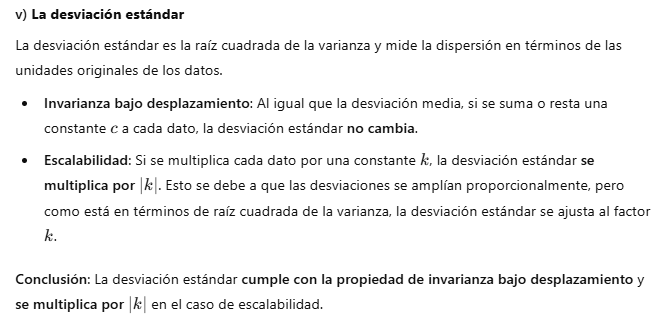

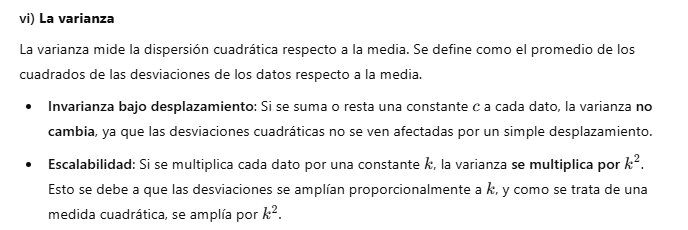

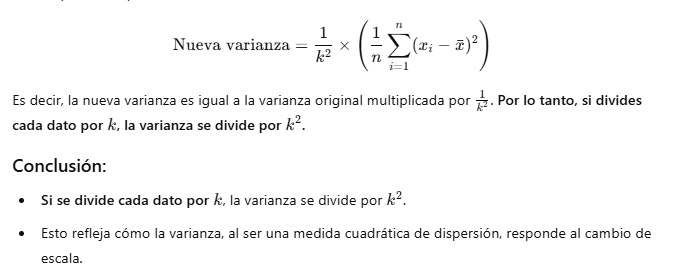

## Ejercicio 4

- Ejercicio 5.4: no cambia

- Ejercicio 5.5: la desviación estándar será dividida entre 16


## Ejercicio 5

Todos los datos son iguales

## Ejercicio 6

In [42]:
ej1 = pd.Series([10, 8, 6, 0, 8, 3, 2, 2, 8, 0]).std(ddof= 0)
ej2 = pd.Series([1, 3, 3, 5, 5, 5, 7, 7, 9 ]).std(ddof= 0)
ej3 = pd.Series([20, 1, 2, 5, 4, 4, 4, 0]).std(ddof= 0)
ej4 = pd.Series([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]).std(ddof= 0)

print('a)',round(ej1, 2))
print('b)',round(ej2, 2))
print('c)',round(ej3, 2))
print('d)', round(ej4, 2))

a) 3.52
b) 2.31
c) 5.89
d) 0.0


## Ejercicio 7

Porque hay un outlier, el número 20

## Ejercicio 8

In [43]:
ej1 = max(pd.Series([10, 8, 6, 0, 8, 3, 2, 2, 8, 0]))- min(pd.Series([10, 8, 6, 0, 8, 3, 2, 2, 8, 0]))
ej2 = max(pd.Series([1, 3, 3, 5, 5, 5, 7, 7, 9 ])) - min(pd.Series([1, 3, 3, 5, 5, 5, 7, 7, 9 ]))
ej3 = max(pd.Series([20, 1, 2, 5, 4, 4, 4, 0])) - min(pd.Series([20, 1, 2, 5, 4, 4, 4, 0]))
ej4 = max(pd.Series([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])) - min(pd.Series([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

print('a)',round(ej1, 2))
print('b)',round(ej2, 2))
print('c)',round(ej3, 2))
print('d)', round(ej4, 2))

a) 10
b) 8
c) 20
d) 0


El rango del tercer grupo de datos es una medida engañosa

## Ejercicio 9

In [64]:
placebo = [-3, 10, -3, 3, 4, -3, 2, - 1, -1]
dosis_fuerte = [5, -17, -7, -3, -7, -9, -6, 1, -3]
cronica = [-4, 1, 11, 3, -2, -6, -4, 3]

a1 = round(pd.Series(placebo).var(ddof=0),2)
a2 = round(pd.Series(placebo).std(ddof=0),2)
b1 = round(pd.Series(dosis_fuerte).var(ddof=0),2)
b2 = round(pd.Series(dosis_fuerte).std(ddof=0),2)
c1 = round(pd.Series(cronica).var(ddof=0),2)
c2 = round(pd.Series(cronica).std(ddof=0),2)

print(f"""a)
Varianza: {a1}
Desvío estándar: {a2} 
{'-' * 25}
b)
Varianza: {b1}
Desvío estándar: {b2}
{'-' * 25}
c)
Varianza: {c1}
Desvío estándar: {c2} """)

a)
Varianza: 16.77
Desvío estándar: 4.09 
-------------------------
b)
Varianza: 34.77
Desvío estándar: 5.9
-------------------------
c)
Varianza: 26.44
Desvío estándar: 5.14 


## Ejercicio 10

In [74]:
datos_ej5_cap3 = [6.3, 8.8, 7.9, 9.2, 8.6, 8.7, 8.3, 7.8, 4.0, 6.7,
            6.8, 7.6, 4.6, 8.1, 9.2, 7.7, 8.4, 7.6, 7.0, 6.6,
            7.7, 7.5, 9.8, 8.1, 8.2, 8.1, 8.7, 7.8, 7.0, 6.0,
            9.4, 7.9, 5.2, 8.2, 7.7, 8.1, 7.7, 7.0, 7.4, 6.1]

ej1 = round(pd.Series(datos_ej5_cap3).mean(),2)
ej2 = round(pd.Series(datos_ej5_cap3).std(ddof=0),2)

print(f"""Media: {ej1}
Desvío estándar: {ej2}""") 

Media: 7.59
Desvío estándar: 1.21


*Aclaración: la respuesta del libro para la desviación estándar es incorrecta*

## Ejercicio 11

In [78]:
datos_ej11 = [56, 65, 48, 73, 59, 72, 63, 
              65, 60, 63, 44, 79, 63, 61, 
              66, 69, 64, 71, 58, 63]

media = round(np.mean(datos_ej11), 2)
rango = round(np.max(datos_ej11) - np.min(datos_ej11), 2)
siqr =  round((np.percentile(datos, 75) -  np.percentile(datos, 25))/2,2)
desviacion_media = round(np.mean(np.abs(datos_ej11 - media)),2)
desviacion_estandar = round(pd.Series(datos_ej11).std(ddof = 0),2)
varianza = round(pd.Series(datos_ej11).var(ddof=0),2)

print('Media:', media)
print('Rango:', rango)
print('Rango semintercuartil:', siqr)
print('Desviación media:', desviacion_media)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

Media: 63.1
Rango: 35
Rango semintercuartil: 2.0
Desviación media: 5.61
Desviación estándar: 7.89
Varianza: 62.19


*Aclaración: la respueta del rango semiintercuartil que da el libro en realidad es el rango intercuartil. Puede haber diferencias por errores de redondeo de los autores.*

## Ejercicio 13

In [47]:
datos_ej24_cap3 = [67,75,63,71,65,73,71,88,61,
                  65,56,62,58,72,66,76,77,75,
                  61,70,64,71,63,61,63,64,62,
                  69,60,66,78,92,64,64,69,64,
                  65,75,72,67,88,74,65,73,
                  78,62,68,69,67,57,65,58]

ej1 = round(pd.Series(datos_ej24_cap3).mean(),2)
ej2 = round(pd.Series(datos_ej24_cap3).std(ddof=0),2)

print(f"""Media: {ej1}
Desvío estándar: {ej2}""") 


Media: 68.25
Desvío estándar: 7.61


## Ejercicio 16

Esta vez importamos los datos de un archivo externo (asegúrense de tenerlo en la misma carpeta en que tienen este cuaderno de Jupyter).

In [83]:
df16= pd.read_csv('datos_ej16_cap6.csv')
df16

,DIA,ENERO 1965,ENERO 1966,MAYO 1965,MAYO 1966
0,1,35,62,71,66
1,2,29,52,77,60
2,3,32,46,71,68
3,4,39,45,90,59
4,5,43,53,62,70
5,6,44,47,78,83
6,7,44,47,52,66
7,8,49,44,60,61
8,9,55,30,78,52
9,10,40,48,92,57


In [92]:
media = round(np.mean(df16['ENERO 1965']),2)
rango = round(np.max(df16['ENERO 1965']) - np.min(df16['ENERO 1965']), 2)
desviacion_media = round(np.mean(np.abs(df16['ENERO 1965'] - media)),2)
desviacion_estandar = round(pd.Series(df16['ENERO 1965']).std(ddof = 0),2)
varianza = round(pd.Series(df16['ENERO 1965']).var(ddof=0),2)

print('Media:', media)
print('Rango:', rango)
print('Desviación media:', desviacion_media)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

print('-'*55)

media = round(np.mean(df16['ENERO 1966']),2)
rango = round(np.max(df16['ENERO 1966']) - np.min(df16['ENERO 1966']), 2)
desviacion_media = round(np.mean(np.abs(df16['ENERO 1966'] - media)),2)
desviacion_estandar = round(pd.Series(df16['ENERO 1966']).std(ddof = 0),2)
varianza = round(pd.Series(df16['ENERO 1966']).var(ddof=0),2)

print('Media:', media)
print('Rango:', rango)
print('Desviación media:', desviacion_media)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

print('-'*55)

media = round(np.mean(df16['MAYO 1965']),2)
rango = round(np.max(df16['MAYO 1965']) - np.min(df16['MAYO 1965']), 2)
desviacion_media = round(np.mean(np.abs(df16['MAYO 1965'] - media)),2)
desviacion_estandar = round(pd.Series(df16['MAYO 1965']).std(ddof = 0),2)
varianza = round(pd.Series(df16['MAYO 1965']).var(ddof=0),2)

print('Media:', media)
print('Rango:', rango)
print('Desviación media:', desviacion_media)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

print('-'*55)

media = round(np.mean(df16['MAYO 1966']),2)
rango = round(np.max(df16['MAYO 1966']) - np.min(df16['MAYO 1966']), 2)
desviacion_media = round(np.mean(np.abs(df16['MAYO 1966'] - media)),2)
desviacion_estandar = round(pd.Series(df16['MAYO 1966']).std(ddof = 0),2)
varianza = round(pd.Series(df16['MAYO 1966']).var(ddof=0),2)

print('Media:', media)
print('Rango:', rango)
print('Desviación media:', desviacion_media)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

Media: 35.58
Rango: 39
Desviación media: 7.78
Desviación estándar: 9.72
Varianza: 94.5
-------------------------------------------------------
Media: 38.65
Rango: 43
Desviación media: 7.4
Desviación estándar: 9.39
Varianza: 88.23
-------------------------------------------------------
Media: 76.9
Rango: 42
Desviación media: 7.47
Desviación estándar: 9.53
Varianza: 90.73
-------------------------------------------------------
Media: 70.42
Rango: 33
Desviación media: 7.81
Desviación estándar: 9.23
Varianza: 85.28


*Aclaración: las diferencias en las varianzas en las varianzas se deben a errores de redondeo*

## Ejercicio 17

También fue 0.40 pesos, en ambos días

## Ejercicio 18

In [79]:
fabricante_a = [5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9]
fabricante_b = [2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 20, 20, 20]

rango = rango = round(np.max(fabricante_a) - np.min(fabricante_a), 2)
desviacion_estandar = round(pd.Series(fabricante_a).std(ddof = 0),2)
varianza = round(pd.Series(fabricante_a).var(ddof=0),2)

print('     Fabricante A:')
print('Rango:', rango)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

print('-'*30)

rango = rango = round(np.max(fabricante_b) - np.min(fabricante_b), 2)
desviacion_estandar = round(pd.Series(fabricante_b).std(ddof = 0),2)
varianza = round(pd.Series(fabricante_b).var(ddof=0),2)

print('     Fabricante B:')
print('Rango:', rango)
print('Desviación estándar:', desviacion_estandar)
print('Varianza:', varianza)

     Fabricante A:
Rango: 4
Desviación estándar: 1.26
Varianza: 1.6
------------------------------
     Fabricante B:
Rango: 18
Desviación estándar: 5.3
Varianza: 28.09


## Ejercicio 19

In [51]:
df19 = pd.read_csv('datos_ej19_cap6.csv')
df19

,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
Barrow - Alaska,0.2,0.2,0.1,0.1,0.1,0.4,0.8,0.9,0.6,0.5,0.2,0.2
Burlington - Vt.,2.0,1.8,2.1,2.6,3.0,3.5,3.9,3.4,3.3,3.0,2.6,2.1
Honolulu - Hawaii,3.8,3.3,2.9,1.3,1.0,0.3,0.4,0.9,1.0,1.8,2.2,3.0
Seattle-Tacoma - Washington,5.7,4.2,3.8,2.4,1.7,1.6,0.8,1.0,2.1,4.0,5.4,6.3


In [52]:
for n in range(0, len(df19['ENERO'])):
    c = df19.iloc[n]
    varianza = round(statistics.pvariance(c),2)
    desviacion_estandar = round(statistics.pstdev(c),2)
    print('Varianza:', varianza)
    print('Desvío estándar:', desviacion_estandar)
    print('-'*30)

Varianza: 0.07
Desvío estándar: 0.27
------------------------------
Varianza: 0.42
Desvío estándar: 0.65
------------------------------
Varianza: 1.3
Desvío estándar: 1.14
------------------------------
Varianza: 3.33
Desvío estándar: 1.82
------------------------------


## Ejercicio 20

In [80]:
datos_ej30_cap3 = [0,1,2,3,4,5,6,
                  1,2,3,4,5,6,7,
                  2,3,4,5,6,7,8,
                  3,4,5,6,7,8,9,
                  4,5,6,7,8,9,10,
                  5,6,7,8,9,10,11,
                  6,7,8,9,10,11,12]

datos_ej35_cap5 = [n/2 for n in datos_ej30_cap3]
varianza = round(statistics.variance(datos_ej35_cap5),2)
desviacion_estandar = round(statistics.stdev(datos_ej35_cap5),2) # son muestras. El libro está mal
print('Varianza:', varianza)
print('Desvío estándar:', desviacion_estandar)


Varianza: 2.04
Desvío estándar: 1.43


## Ejercicio 21

In [54]:
presion_control = [139.6, 213.3, 162.3, 166.9, 157.8, 165.7, 149]
presion_acondicionamiento= [136.1, 179.5, 133.1, 150.4, 141.7, 166.6, 131.7]
diferencias = [-3.5, -33.8, -29.2, -16.5, -16.1, 0.9, -17.3]

lista_de_listas = [presion_control, presion_acondicionamiento, diferencias]
for c in lista_de_listas:
    varianza = round(statistics.pvariance(c),2)
    desviacion_estandar = round(statistics.pstdev(c),2)
    print('Varianza:', varianza)
    print('Desvío estándar:', desviacion_estandar)
    print('-'*30)


Varianza: 471.04
Desvío estándar: 21.7
------------------------------
Varianza: 287.37
Desvío estándar: 16.95
------------------------------
Varianza: 133.31
Desvío estándar: 11.55
------------------------------
